# Diffusivity

This notebook analyze the diffusivity based on the trajectory data.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import trackpy as tp
from skimage import io

In [3]:
folder = '/home/zhengyang/data/DE/07162021/3'
data = pd.read_csv(os.path.join(folder, 'crop_HoughCircles', 'traj.csv'))

In [13]:
t = tp.link(data.rename(columns={'t': 'frame'}), 100)

Frame 1778: 1 trajectories present.


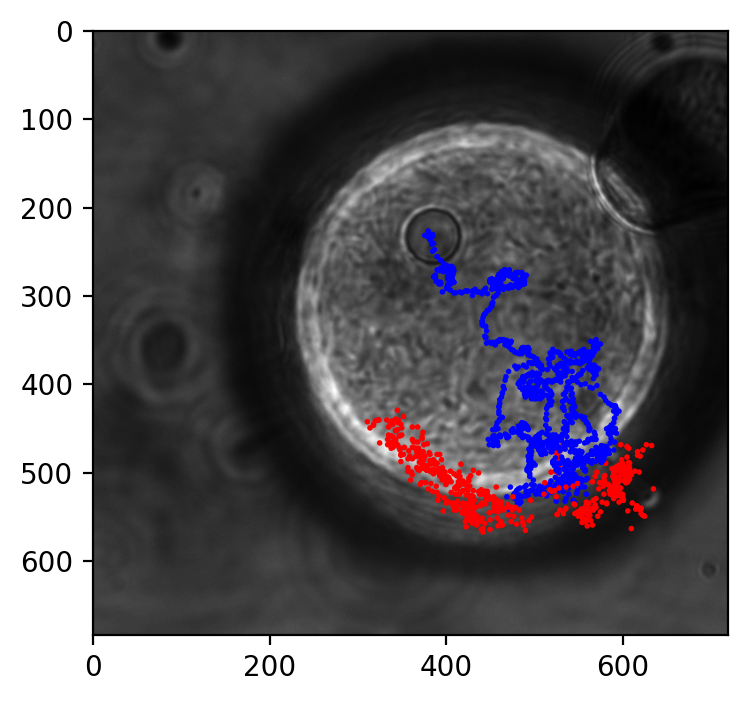

In [77]:
img = io.imread(os.path.join(folder, 'Image4_00001.tif'))
plt.figure(dpi=200)
plt.imshow(img, cmap='gray')
plt.scatter(data.x, data.y, c=-data.validity, s=1, cmap='bwr')

In [46]:
valid_traj = t.loc[data.validity==True]

In [75]:
msd = tp.msd(valid_traj, mpp=0.11, fps=30, max_lagtime=100)

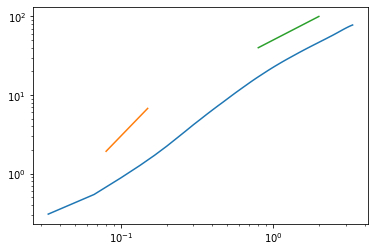

In [76]:
plt.plot(msd.lagt, msd.msd)
plt.loglog()

x = np.array([.08, .15])
y = 300 * x ** 2
plt.plot(x, y)

x = np.array([.8, 2])
y =  50 * x ** 1
plt.plot(x, y)

**Comments:**
- Cristian's data shows ballistic regime at ~0.02 s, diffusive regime at ~1 s and subdiffusive (plateau) regime at ~10 s. To produce data that is comparable to his, longer video with higher frame rate is necessary (80 fps for 1000 s)
- In the current test video (0716/3), the outer droplet moves significantly. As a result, the motion of inner droplet is affected. For more accurate analysis, I need to track the outer droplet and subtract its motion from the inner's.